In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

In [21]:
plotpath="/glade/campaign/cgd/cas/islas/python_plots/NCAR_CW3E_SMYLE/FIGURES/"

In [2]:
basepath="/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/NAO/"
nao_l32_sep = xr.open_dataset(basepath+'NAO_stationbased_L32_initmon09.nc').isel(time=slice(0,6))
nao_l83_sep = xr.open_dataset(basepath+'NAO_stationbased_L83_initmon09.nc').isel(time=slice(0,6))
nao_era5_sep = xr.open_dataset(basepath+'NAO_stationbased_ERA5_initmon09.nc').isel(time=slice(0,6))
nao_jra_sep = xr.open_dataset(basepath+'NAO_stationbased_JRA3Q_initmon09.nc').isel(time=slice(0,6))

nao_l32_nov = xr.open_dataset(basepath+'NAO_stationbased_L32_initmon11.nc').isel(time=slice(0,6))
nao_l83_nov = xr.open_dataset(basepath+'NAO_stationbased_L83_initmon11.nc').isel(time=slice(0,6))
nao_era5_nov = xr.open_dataset(basepath+'NAO_stationbased_ERA5_initmon11.nc').isel(time=slice(0,6))
nao_jra_nov = xr.open_dataset(basepath+'NAO_stationbased_JRA3Q_initmon11.nc').isel(time=slice(0,6))

nao_l32_feb = xr.open_dataset(basepath+'NAO_stationbased_L32_initmon02.nc').isel(time=slice(0,6))
nao_l83_feb = xr.open_dataset(basepath+'NAO_stationbased_L83_initmon02.nc').isel(time=slice(0,6))
nao_era5_feb = xr.open_dataset(basepath+'NAO_stationbased_ERA5_initmon02.nc').isel(time=slice(0,6))
nao_jra_feb = xr.open_dataset(basepath+'NAO_stationbased_JRA3Q_initmon02.nc').isel(time=slice(0,6))

### Calculate 3 month rolling seasonal averages

In [3]:
nao_l32_sep_rolling = nao_l32_sep.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_l83_sep_rolling = nao_l83_sep.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_era5_sep_rolling = nao_era5_sep.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_jra_sep_rolling = nao_jra_sep.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')

nao_l32_nov_rolling = nao_l32_nov.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_l83_nov_rolling = nao_l83_nov.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_era5_nov_rolling = nao_era5_nov.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_jra_nov_rolling = nao_jra_nov.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')

nao_l32_feb_rolling = nao_l32_feb.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_l83_feb_rolling = nao_l83_feb.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_era5_feb_rolling = nao_era5_feb.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')
nao_jra_feb_rolling = nao_jra_feb.NAO.rolling(time=3, center=True, min_periods=3).mean().dropna('time')

### Remove the lead dependent climatology (should already be zero)

In [4]:
nao_l32_sep_rolling = nao_l32_sep_rolling - nao_l32_sep_rolling.mean('init_year')
nao_l83_sep_rolling = nao_l83_sep_rolling - nao_l83_sep_rolling.mean('init_year')
nao_era5_sep_rolling = nao_era5_sep_rolling - nao_era5_sep_rolling.mean('init_year')
nao_jra_sep_rolling = nao_jra_sep_rolling - nao_jra_sep_rolling.mean('init_year')

nao_l32_nov_rolling = nao_l32_nov_rolling - nao_l32_nov_rolling.mean('init_year')
nao_l83_nov_rolling = nao_l83_nov_rolling - nao_l83_nov_rolling.mean('init_year')
nao_era5_nov_rolling = nao_era5_nov_rolling - nao_era5_nov_rolling.mean('init_year')
nao_jra_nov_rolling = nao_jra_nov_rolling - nao_jra_nov_rolling.mean('init_year')

nao_l32_feb_rolling = nao_l32_feb_rolling - nao_l32_feb_rolling.mean('init_year')
nao_l83_feb_rolling = nao_l83_feb_rolling - nao_l83_feb_rolling.mean('init_year')
nao_era5_feb_rolling = nao_era5_feb_rolling - nao_era5_feb_rolling.mean('init_year')
nao_jra_feb_rolling = nao_jra_feb_rolling - nao_jra_feb_rolling.mean('init_year')

### Calculate the ACC

In [5]:
cor_l32_sep_era5 = xr.corr(nao_l32_sep_rolling.mean('M'), nao_era5_sep_rolling, dim='init_year')
cor_l83_sep_era5 = xr.corr(nao_l83_sep_rolling.mean('M'), nao_era5_sep_rolling, dim='init_year')

cor_l32_nov_era5 = xr.corr(nao_l32_nov_rolling.mean('M'), nao_era5_nov_rolling, dim='init_year')
cor_l83_nov_era5 = xr.corr(nao_l83_nov_rolling.mean('M'), nao_era5_nov_rolling, dim='init_year')

cor_l32_feb_era5 = xr.corr(nao_l32_feb_rolling.mean('M'), nao_era5_feb_rolling, dim='init_year')
cor_l83_feb_era5 = xr.corr(nao_l83_feb_rolling.mean('M'), nao_era5_feb_rolling, dim='init_year')

cor_l32_sep_jra = xr.corr(nao_l32_sep_rolling.mean('M'), nao_jra_sep_rolling, dim='init_year')
cor_l83_sep_jra = xr.corr(nao_l83_sep_rolling.mean('M'), nao_jra_sep_rolling, dim='init_year')

cor_l32_nov_jra = xr.corr(nao_l32_nov_rolling.mean('M'), nao_jra_nov_rolling, dim='init_year')
cor_l83_nov_jra = xr.corr(nao_l83_nov_rolling.mean('M'), nao_jra_nov_rolling, dim='init_year')

cor_l32_feb_jra = xr.corr(nao_l32_feb_rolling.mean('M'), nao_jra_feb_rolling, dim='init_year')
cor_l83_feb_jra = xr.corr(nao_l83_feb_rolling.mean('M'), nao_jra_feb_rolling, dim='init_year')

### Calculate the MSSS

In [6]:
def calcmsss(mod,obs,dim='init_year'):
    mse_mod = (1./mod[dim].size)*((mod - obs)**2).sum('init_year')
    mse_obs = (1./mod[dim].size)*(obs**2).sum('init_year')
    msss = 1 - (mse_mod / mse_obs)
    
    # dealing with the levels where low top doesn't have any data
    msss = msss.where( msss != 1, nan)
    return msss

In [7]:
msss_l32_sep_era5 = calcmsss(nao_l32_sep_rolling.mean('M'), nao_era5_sep_rolling, dim='init_year')
msss_l83_sep_era5 = calcmsss(nao_l83_sep_rolling.mean('M'), nao_era5_sep_rolling, dim='init_year')

msss_l32_nov_era5 = calcmsss(nao_l32_nov_rolling.mean('M'), nao_era5_nov_rolling, dim='init_year')
msss_l83_nov_era5 = calcmsss(nao_l83_nov_rolling.mean('M'), nao_era5_nov_rolling, dim='init_year')

msss_l32_feb_era5 = calcmsss(nao_l32_feb_rolling.mean('M'), nao_era5_feb_rolling, dim='init_year')
msss_l83_feb_era5 = calcmsss(nao_l83_feb_rolling.mean('M'), nao_era5_feb_rolling, dim='init_year')

msss_l32_sep_jra = calcmsss(nao_l32_sep_rolling.mean('M'), nao_jra_sep_rolling, dim='init_year')
msss_l83_sep_jra = calcmsss(nao_l83_sep_rolling.mean('M'), nao_jra_sep_rolling, dim='init_year')

msss_l32_nov_jra = calcmsss(nao_l32_nov_rolling.mean('M'), nao_jra_nov_rolling, dim='init_year')
msss_l83_nov_jra = calcmsss(nao_l83_nov_rolling.mean('M'), nao_jra_nov_rolling, dim='init_year')

msss_l32_feb_jra = calcmsss(nao_l32_feb_rolling.mean('M'), nao_jra_feb_rolling, dim='init_year')
msss_l83_feb_jra = calcmsss(nao_l83_feb_rolling.mean('M'), nao_jra_feb_rolling, dim='init_year')




### Read in the significance, calculated at ~/DATA_SORT/SIGNIF/fig8

In [8]:
signif_sep = xr.open_dataset("/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/SIGNIF/fig8/ci_NAO_init09.nc")
signif_nov = xr.open_dataset("/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/SIGNIF/fig8/ci_NAO_init11.nc")
signif_feb = xr.open_dataset("/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/SIGNIF/fig8/ci_NAO_init02.nc")

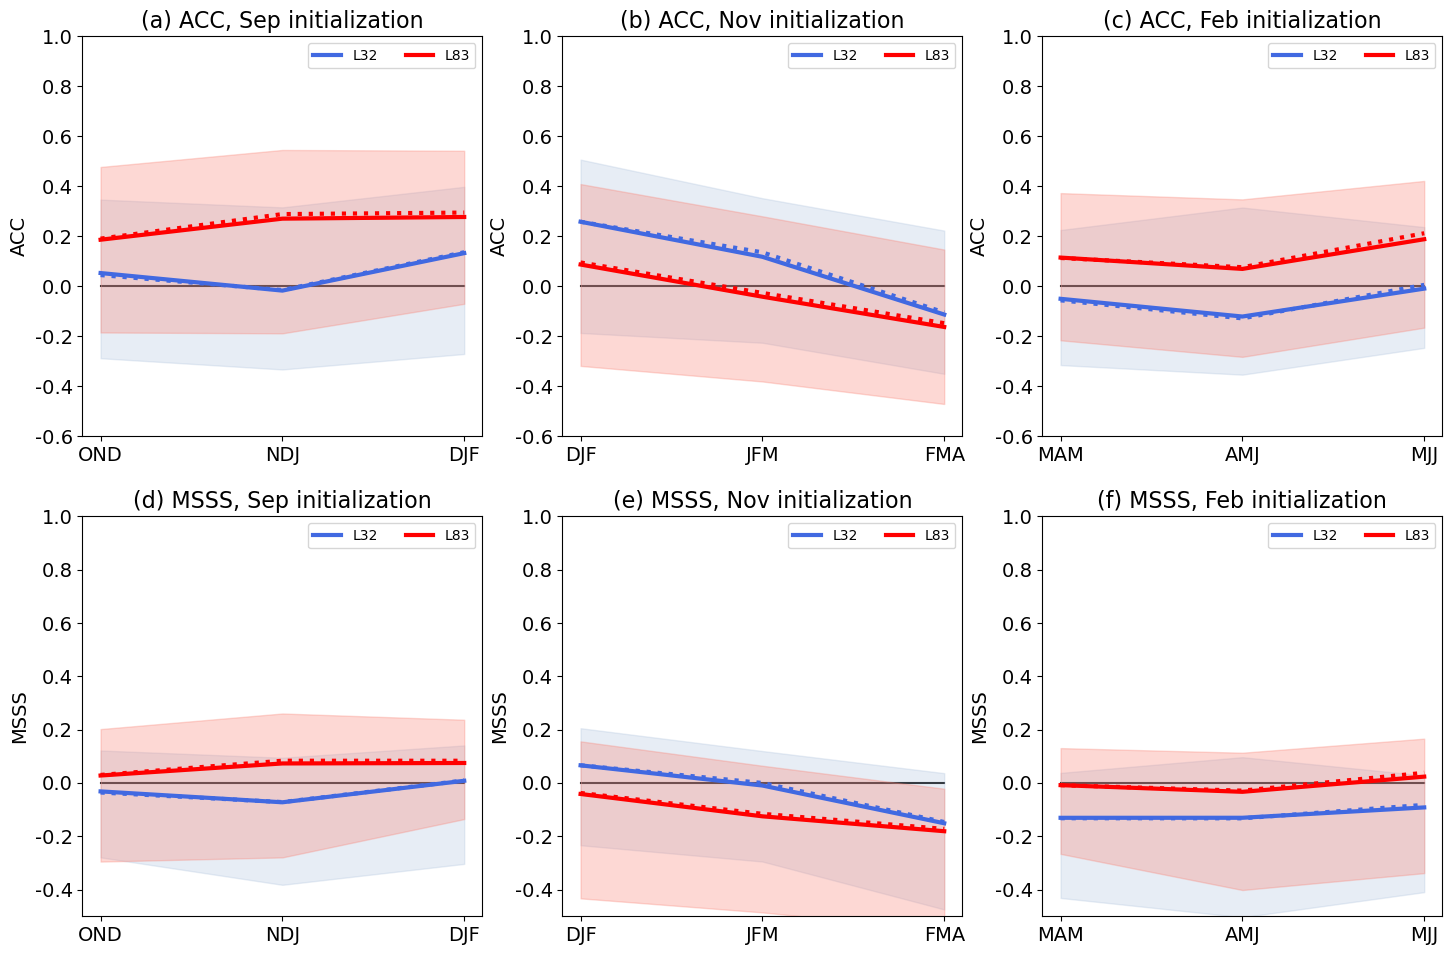

In [22]:
fig = plt.figure(figsize=(16,16))


#----ACC September initialization
ax = fig.add_axes([0.05,0.7,0.25,0.25])
ax.set_ylim(-0.6,1)
ax.set_title('(a) ACC, Sep initialization', fontsize=16)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['OND','NDJ','DJF'], fontsize=14)
ax.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.6','-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=14)
ax.set_ylabel('ACC', fontsize=14)
ax.plot([0,2],[0,0], color='black', zorder=0)
ax.fill_between(np.arange(0,3,1), signif_sep.min95_low_cor.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_sep.max95_low_cor.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='lightsteelblue', alpha=0.3)
ax.fill_between(np.arange(0,3,1), signif_sep.min95_high_cor.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_sep.max95_high_cor.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='salmon', alpha=0.3)

ax.plot(np.arange(0,3,1), cor_l32_sep_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, label = 'L32')
ax.plot(np.arange(0,3,1), cor_l32_sep_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, linestyle='dotted')
ax.plot(np.arange(0,3,1), cor_l83_sep_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, label='L83')
ax.plot(np.arange(0,3,1), cor_l83_sep_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, linestyle='dotted')
ax.legend(ncol=2, loc='upper right')

#---ACC November initialization
ax = fig.add_axes([0.35,0.7,0.25,0.25])
ax.set_ylim(-0.6,1)
ax.set_title('(b) ACC, Nov initialization', fontsize=16)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['DJF','JFM','FMA'], fontsize=14)
ax.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.6','-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=14)
ax.set_ylabel('ACC', fontsize=14)
ax.plot([0,2],[0,0], color='black', zorder=0)
ax.fill_between(np.arange(0,3,1), signif_nov.min95_low_cor.isel(time=slice(1,cor_l32_nov_era5.time.size)), 
                                  signif_nov.max95_low_cor.isel(time=slice(1,cor_l32_nov_era5.time.size)),
                                  color='lightsteelblue', alpha=0.3)
ax.fill_between(np.arange(0,3,1), signif_nov.min95_high_cor.isel(time=slice(1,cor_l32_nov_era5.time.size)), 
                                  signif_nov.max95_high_cor.isel(time=slice(1,cor_l32_nov_era5.time.size)),
                                  color='salmon', alpha=0.3)

ax.plot(np.arange(0,3,1), cor_l32_nov_era5.isel(time=slice(1,cor_l32_nov_era5.time.size)), color='royalblue', linewidth=3, label='L32')
ax.plot(np.arange(0,3,1), cor_l32_nov_jra.isel(time=slice(1,cor_l32_nov_era5.time.size)), color='royalblue', linewidth=3, linestyle='dotted')
ax.plot(np.arange(0,3,1), cor_l83_nov_era5.isel(time=slice(1,cor_l32_nov_era5.time.size)), color='red', linewidth=3, label='L83')
ax.plot(np.arange(0,3,1), cor_l83_nov_jra.isel(time=slice(1,cor_l32_nov_era5.time.size)), color='red', linewidth=3, linestyle='dotted')
ax.legend(ncol=2, loc='upper right')

#---ACC February initialization
ax = fig.add_axes([0.65,0.7,0.25,0.25])
ax.set_ylim(-0.6,1)
ax.set_title('(c) ACC, Feb initialization', fontsize=16)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['MAM','AMJ','MJJ'], fontsize=14)
ax.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.6','-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=14)
ax.set_ylabel('ACC', fontsize=14)
ax.plot([0,2],[0,0], color='black', zorder=0)
ax.fill_between(np.arange(0,3,1), signif_feb.min95_low_cor.isel(time=slice(1,cor_l32_feb_era5.time.size)), 
                                  signif_feb.max95_low_cor.isel(time=slice(1,cor_l32_feb_era5.time.size)),
                                  color='lightsteelblue', alpha=0.3)
ax.fill_between(np.arange(0,3,1), signif_feb.min95_high_cor.isel(time=slice(1,cor_l32_feb_era5.time.size)), 
                                  signif_feb.max95_high_cor.isel(time=slice(1,cor_l32_feb_era5.time.size)),
                                  color='salmon', alpha=0.3)

ax.plot(np.arange(0,3,1), cor_l32_feb_era5.isel(time=slice(1,cor_l32_feb_era5.time.size)), color='royalblue', linewidth=3, label='L32')
ax.plot(np.arange(0,3,1), cor_l32_feb_jra.isel(time=slice(1,cor_l32_feb_era5.time.size)), color='royalblue', linewidth=3, linestyle='dotted')
ax.plot(np.arange(0,3,1), cor_l83_feb_era5.isel(time=slice(1,cor_l32_feb_era5.time.size)), color='red', linewidth=3, label='L83')
ax.plot(np.arange(0,3,1), cor_l83_feb_jra.isel(time=slice(1,cor_l32_feb_era5.time.size)), color='red', linewidth=3, linestyle='dotted')
ax.legend(ncol=2, loc='upper right')

#---MSSS September initialization
ax = fig.add_axes([0.05,0.4,0.25,0.25])
ax.set_ylim(-0.5,1)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['OND','NDJ','DJF'], fontsize=14)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=14)
ax.plot([0,2],[0,0], color='black', zorder=0)
ax.set_ylabel('MSSS', fontsize=14)
ax.set_title('(d) MSSS, Sep initialization', fontsize=16)
ax.fill_between(np.arange(0,3,1), signif_sep.min95_low_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_sep.max95_low_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='lightsteelblue', alpha=0.3)
ax.fill_between(np.arange(0,3,1), signif_sep.min95_high_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_sep.max95_high_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='salmon', alpha=0.3)

ax.plot(np.arange(0,3,1), msss_l32_sep_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, label='L32')
ax.plot(np.arange(0,3,1), msss_l32_sep_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, linestyle='dotted')
ax.plot(np.arange(0,3,1), msss_l83_sep_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, label='L83')
ax.plot(np.arange(0,3,1), msss_l83_sep_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, linestyle='dotted')
ax.legend(ncol=2, loc='upper right')

#---MSSS November initialization
ax = fig.add_axes([0.35,0.4,0.25,0.25])
ax.set_ylim(-0.5,1)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['DJF','JFM','FMA'], fontsize=14)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=14)
ax.plot([0,2],[0,0], color='black', zorder=0)
ax.set_ylabel('MSSS', fontsize=14)
ax.set_title('(e) MSSS, Nov initialization', fontsize=16)
ax.fill_between(np.arange(0,3,1), signif_nov.min95_low_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_nov.max95_low_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='lightsteelblue', alpha=0.3)
ax.fill_between(np.arange(0,3,1), signif_nov.min95_high_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_nov.max95_high_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='salmon', alpha=0.3)

ax.plot(np.arange(0,3,1), msss_l32_nov_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, label='L32')
ax.plot(np.arange(0,3,1), msss_l32_nov_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, linestyle='dotted')
ax.plot(np.arange(0,3,1), msss_l83_nov_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, label='L83')
ax.plot(np.arange(0,3,1), msss_l83_nov_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, linestyle='dotted')
ax.legend(ncol=2, loc='upper right')

#----MSSS February initialization
ax = fig.add_axes([0.65,0.4,0.25,0.25])
ax.set_ylim(-0.5,1)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['MAM','AMJ','MJJ'], fontsize=14)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=14)
ax.plot([0,2],[0,0], color='black', zorder=0)
ax.set_ylabel('MSSS', fontsize=14)
ax.set_title('(f) MSSS, Feb initialization', fontsize=16)
ax.fill_between(np.arange(0,3,1), signif_feb.min95_low_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_feb.max95_low_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='lightsteelblue', alpha=0.3)
ax.fill_between(np.arange(0,3,1), signif_feb.min95_high_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)), 
                                  signif_feb.max95_high_msss.isel(time=slice(1,cor_l32_sep_era5.time.size)),
                                  color='salmon', alpha=0.3)

ax.plot(np.arange(0,3,1), msss_l32_feb_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, label='L32')
ax.plot(np.arange(0,3,1), msss_l32_feb_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='royalblue', linewidth=3, linestyle='dotted')
ax.plot(np.arange(0,3,1), msss_l83_feb_era5.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, label='L83')
ax.plot(np.arange(0,3,1), msss_l83_feb_jra.isel(time=slice(1,cor_l32_sep_era5.time.size)), color='red', linewidth=3, linestyle='dotted')
ax.legend(ncol=2, loc='upper right')

fig.savefig(plotpath+'fig8.png', bbox_inches='tight', facecolor='white')

In [35]:
cor_nov_l32_era5

<xarray.DataArray 'PSL' (M: 20, time: 4)>
array([[ 0.31898607, -0.07923216, -0.11982239, -0.09056152],
       [ 0.17571588,  0.09467376, -0.17111054, -0.28742033],
       [ 0.30373216,  0.08285084,  0.03239968, -0.07630776],
       [ 0.09997395, -0.19528273, -0.16758195, -0.02901928],
       [ 0.08939766,  0.02087685, -0.16994121, -0.28559532],
       [ 0.28689472,  0.17769579,  0.15246176, -0.06296015],
       [ 0.36407228,  0.33328334,  0.24373321, -0.05594377],
       [ 0.28806637, -0.02084624,  0.07949079,  0.09245757],
       [ 0.10544301, -0.03284116, -0.07462459,  0.063941  ],
       [ 0.05979139,  0.06536705,  0.10512518,  0.06200296],
       [ 0.1552916 ,  0.05522036, -0.06883398, -0.21077161],
       [ 0.15567305, -0.1100654 , -0.11375912, -0.30070427],
       [ 0.06229004, -0.10435024, -0.1895762 , -0.09341915],
       [ 0.04109959, -0.14364641, -0.14844445, -0.26686967],
       [ 0.32074926,  0.1167509 ,  0.08649577, -0.10414176],
       [ 0.36923426,  0.20203804,  0.14288125,  0.03363533],
       [ 0.2830798 ,  0.07067154,  0.00959475,  0.00214809],
       [ 0.39063458,  0.20976017, -0.02136483,  0.03768963],
       [ 0.28066419,  0.06859217,  0.04867586,  0.21291222],
       [ 0.05056068,  0.14803711,  0.0305129 ,  0.00881819]])
Coordinates:
  * time     (time) datetime64[ns] 1970-12-16 1971-01-16 1971-02-15 1971-03-16
Dimensions without coordinates: M